In [ ]:
import pandas as pd

In [ ]:
!pip install scikit-learn

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/DSA Training Syneos/SuplementaryAnalysis.csv"

In [ ]:
df = pd.read_csv(path, encoding='latin1')

In [ ]:
df.shape

(2096, 5)

In [ ]:
df.head()

,NPI ID,Distinct Patient Count,Distinct Claim Count,Total Patient Count,Total Claim Count
0,1003023045,1,8,8,8
1,1003031212,1,2,2,2
2,1003065582,1,1,1,1
3,1003079997,2,4,4,4
4,1003089814,1,1,1,1


In [ ]:
df[['Distinct Patient Count','Total Claim Count']].corr()

In [ ]:
df[df.duplicated()]

,NPI ID,Distinct Patient Count,Distinct Claim Count,Total Patient Count,Total Claim Count


In [ ]:
## Define X and y & convert it to a 2D data

#X = df["Distinct Patient Count"].values
#Y = df["Total Claim Count"].values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
## train test split

from sklearn.model_selection import train_test_split

In [ ]:
## Define X and y & convert it to a 2D data

X = df["Distinct Patient Count"].values.reshape (-1,1)
Y = df["Total Claim Count"].values.reshape (-1,1)
print("Shape: ", X.shape, Y.shape)

Shape:  (2096, 1) (2096, 1)


Text(0, 0.5, 'Total Claim Count')

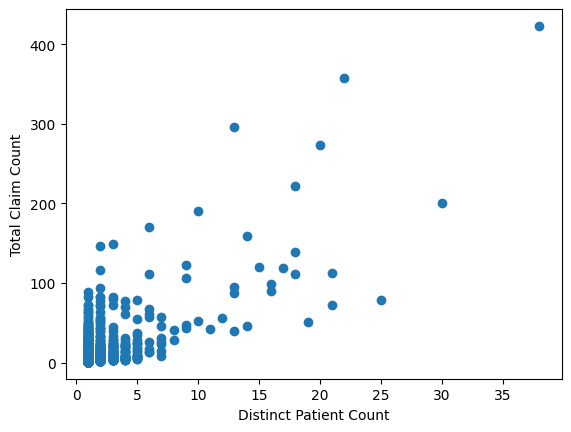

In [ ]:
plt.scatter (X, Y)
plt.xlabel ("Distinct Patient Count")
plt.ylabel ("Total Claim Count")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
print(X_train.shape, X_test.shape)

(1257, 1) (839, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print('Weight coefficients: ', model.coef_)
print('Y-axis intercept: ', model.intercept_)

Weight coefficients:  [[7.04547853]]
Y-axis intercept:  [-2.11806745]


In [ ]:
model.score(X_test, Y_test)

0.5538972321533329

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

print('Mean squared error: ', mean_squared_error(Y_test, Y_pred))

Mean squared error:  270.4293089703073


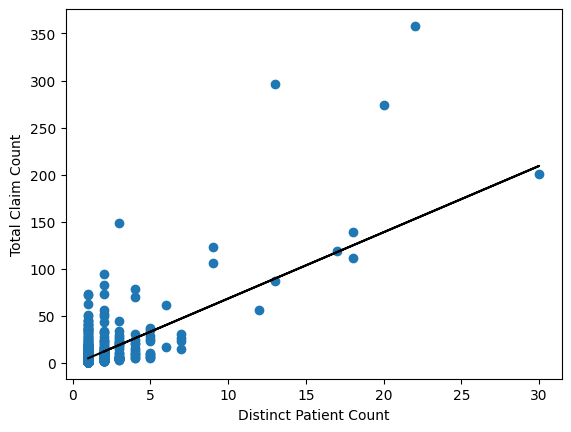

In [ ]:
plt.scatter (X_test, Y_test)
plt.xlabel ("Distinct Patient Count")
plt.ylabel ("Total Claim Count")
plt.plot (X_test, Y_pred, color = 'k')
plt.show()

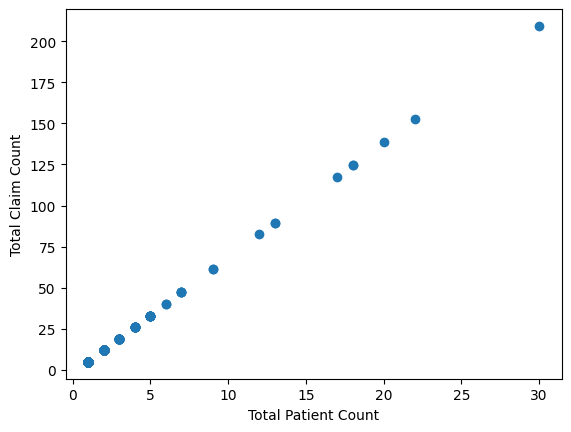

In [ ]:
plt.scatter (X_test, Y_pred)
plt.xlabel ("Total Patient Count")
plt.ylabel ("Total Claim Count")
plt.show()

In [ ]:
## standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)